In [1]:
#!pip install wordcloud
#!pip install textblob'''

In [13]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud,STOPWORDS
stopwords = set(STOPWORDS)

from textblob import TextBlob

import re

from collections import Counter

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Define filepath
filepath = "tweets_output/tweets_output.csv"

In [4]:
# Read data into pandas dataframe
df = pd.read_csv(filepath, parse_dates = True, index_col = 'timestamp')

In [5]:
# Show first 5 rows
df.head()

,year,month,day,text,sentiment
timestamp,,,,,
2009-04-07 06:19:45,2009,4,7,Awww that s a bummer You shoulda got David Ca...,Positive
2009-04-07 06:19:49,2009,4,7,s upset that he can t update his Facebook by t...,Neutral
2009-04-07 06:19:53,2009,4,7,I dived many times for the ball Managed to sa...,Positive
2009-04-07 06:19:57,2009,4,7,my whole body feels itchy and like its on fire,Positive
2009-04-07 06:19:57,2009,4,7,no it s not behaving at all i m mad why am i ...,Negative


In [6]:
# Copy input dataframe into new dataframe
tweet = df.copy()

# Drop unecessary columns
tweet.drop(['year', 'month', 'day'],axis=1, inplace = True)
tweet.head()

,text,sentiment
timestamp,,
2009-04-07 06:19:45,Awww that s a bummer You shoulda got David Ca...,Positive
2009-04-07 06:19:49,s upset that he can t update his Facebook by t...,Neutral
2009-04-07 06:19:53,I dived many times for the ball Managed to sa...,Positive
2009-04-07 06:19:57,my whole body feels itchy and like its on fire,Positive
2009-04-07 06:19:57,no it s not behaving at all i m mad why am i ...,Negative


In [7]:
# check missing values
tweet.isna().sum()


text         0
sentiment    0
dtype: int64

In [8]:
# print shape of data
tweet.shape

(1600000, 2)

## Sentiment analysis

In [9]:
#Removing Stop Words
stopwords

tweet['text'] = tweet['text'].apply(lambda tweets: ' '.join([word for word in tweets.split() if word not in stopwords]))
tweet['text'].head()

timestamp
2009-04-07 06:19:45    Awww s bummer You shoulda got David Carr Third...
2009-04-07 06:19:49    s upset t update Facebook texting might cry re...
2009-04-07 06:19:53    I dived many times ball Managed save The rest ...
2009-04-07 06:19:57                          whole body feels itchy fire
2009-04-07 06:19:57                             s behaving m mad I t see
Name: text, dtype: object

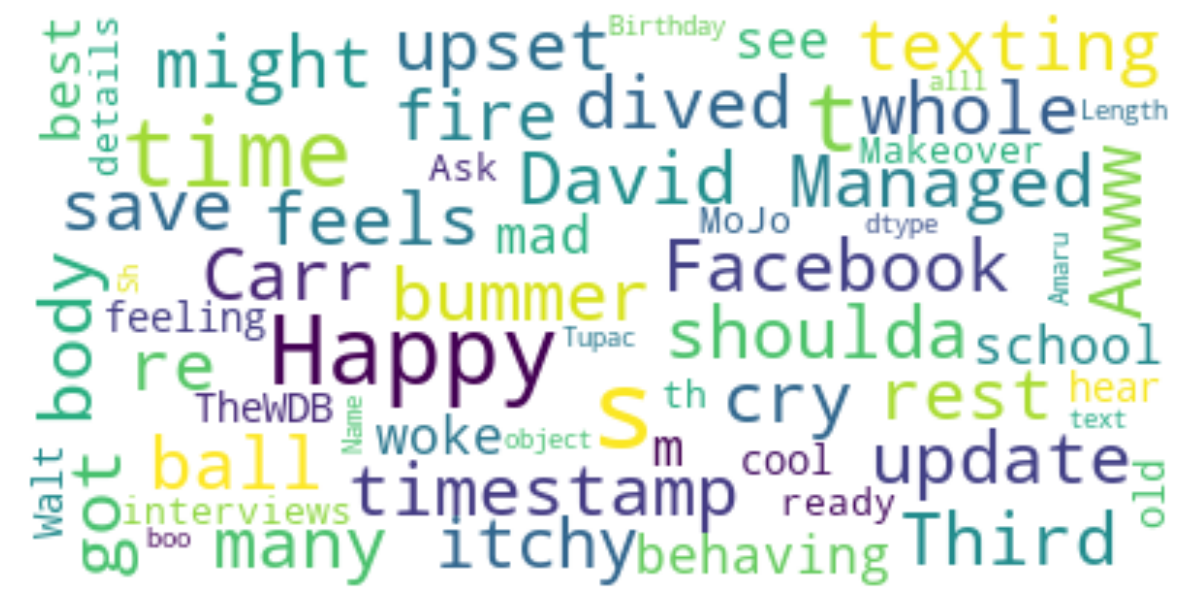

In [10]:
# Define wordcloud function
def show_wordcloud(data , title = None):
    wordcloud = WordCloud(background_color='white',stopwords=stopwords,max_words=200,max_font_size=40).generate(str(data))
  
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    plt.title(title, size = 25)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

# Apply wordcloud fucntion to dataframe and plot results
show_wordcloud(tweet['text'])

Positive    696066
Neutral     566992
Negative    336942
Name: sentiment, dtype: int64


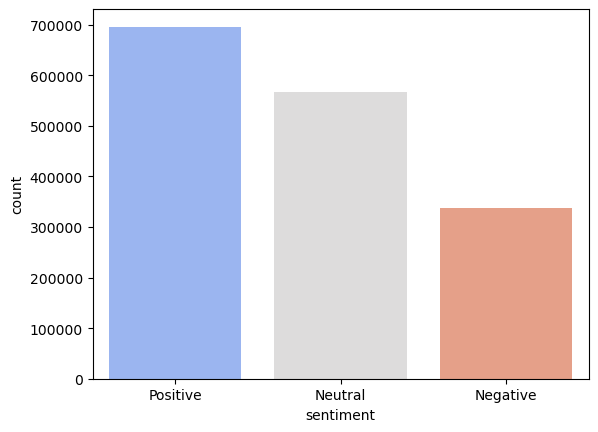

In [11]:
# Print sentiment counts and plot results
print(tweet.sentiment.value_counts())
sns.countplot(x='sentiment', data = tweet, palette='coolwarm');

In [14]:
# get all words and split by sentiment 
all_words = []
all_words = [word for i in df.text for word in i.split()]
pos_words = df['text'][df['sentiment'] == 'Positive']
neg_words = df['text'][df['sentiment'] == 'Negative']
neutral_words = df['text'][df['sentiment'] == 'Neutral']


def get_freq(word_list):
    freq = Counter(word_list).most_common(100)
    freq = pd.DataFrame(freq)
    freq.columns = ['word', 'frequency']
    return freq

all_freq = get_freq(all_words)
pos_freq = get_freq([word for i in pos_words for word in i.split()])
neg_freq = get_freq([word for i in neg_words for word in i.split()])

freq = pd.merge(all_freq,pos_freq,on='word',how='left').rename(columns={'frequency_x':'total','frequency_y':'pos'})
freq = pd.merge(freq,neg_freq,on='word',how='left').rename(columns={'frequency':'neg'}).fillna(0)
freq['score'] = (freq['pos'] - freq['neg'] ) / freq['total']

In [19]:
# Get first 5 most frequent words for positve and negative sentiments
pos_words =  freq[(freq['score'] >0.2) & (freq['pos'] !=0)].sort_values('score',ascending = False).head(5)
neg_words =  freq[(freq['score'] <0.2) & (freq['neg'] !=0)].sort_values('score',ascending = True).head(5)

In [20]:
# concatenate pos_words and neg_words dataframes
sentiment_words = pd.concat([pos_words, neg_words]).sort_values('score',ascending = False).reset_index(drop=True)

In [21]:
# Print results
sentiment_words

,word,total,pos,neg,score
0,lol,30113,29040.0,0.0,0.964368
1,love,53277,49780.0,0.0,0.934362
2,good,72635,67127.0,0.0,0.924169
3,new,35740,30701.0,0.0,0.859010
4,more,35812,30580.0,0.0,0.853904
5,home,37722,0.0,9472.0,-0.251100
6,last,31002,0.0,7880.0,-0.254177
7,still,36757,0.0,9894.0,-0.269173
8,has,30844,0.0,8371.0,-0.271398
9,been,31485,0.0,9133.0,-0.290075


<AxesSubplot:xlabel='score', ylabel='word'>

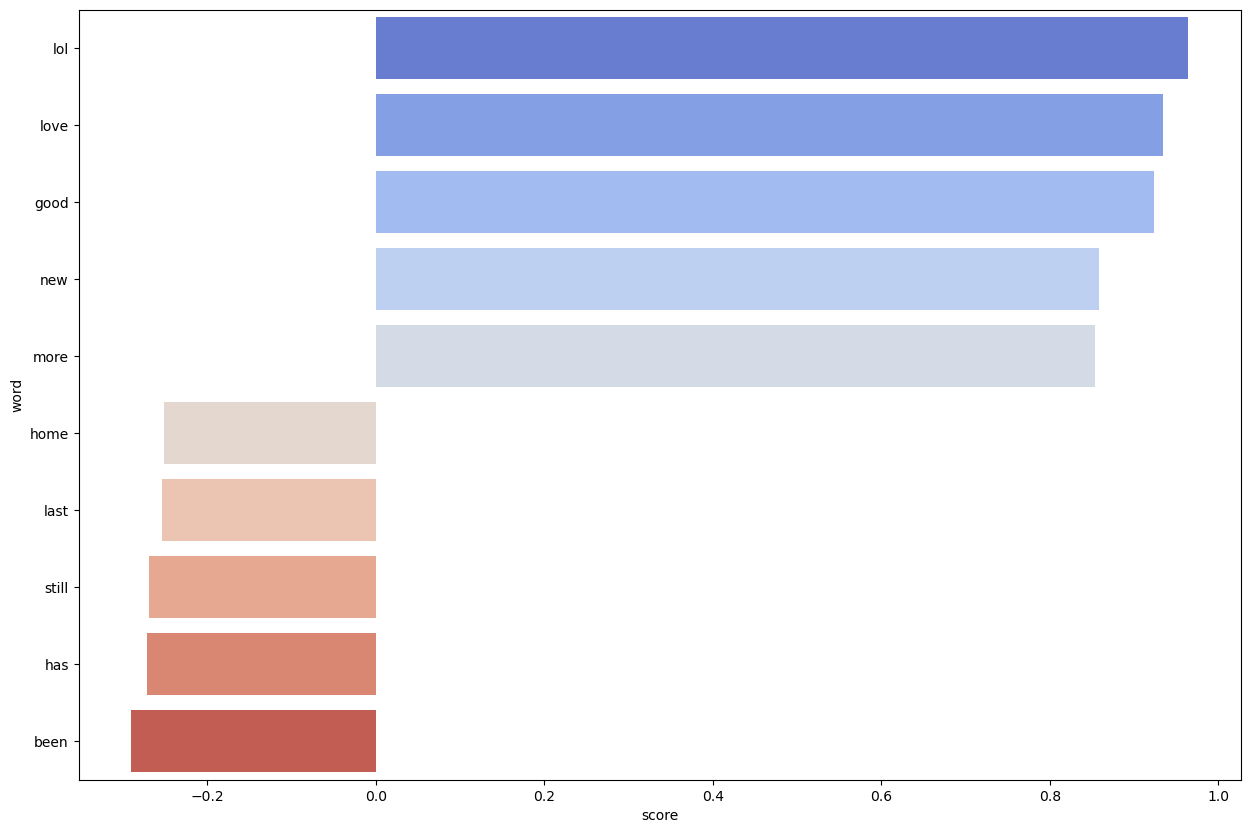

In [22]:
# Plot results
plt.figure(figsize = (15, 10))
sns.barplot(y="word", x="score",data=sentiment_words, palette='coolwarm')

## Sentiment Trend Analysis

In [23]:
# Get sentiment counts by entry and print results
tweet_count = tweet.groupby(['timestamp','sentiment'])['text'].count().reset_index().rename(columns={'text':'count'})
tweet_count.head()


,timestamp,sentiment,count
0,2009-04-07 06:19:45,Positive,1
1,2009-04-07 06:19:49,Neutral,1
2,2009-04-07 06:19:53,Positive,1
3,2009-04-07 06:19:57,Negative,1
4,2009-04-07 06:19:57,Positive,1


In [24]:
# transform timestamo column to datetime type
tweet_count['timestamp'] = pd.to_datetime(tweet_count['timestamp'])

In [25]:
# Pivot table by sentiment and define timestamp as index
tweet_pivoted = tweet_count.pivot(index='timestamp',columns=['sentiment'], values='count')

In [26]:
# Print first 5 rows
tweet_pivoted.head()

sentiment,Negative,Neutral,Positive
timestamp,,,
2009-04-07 06:19:45,NaN,NaN,1.0
2009-04-07 06:19:49,NaN,1.0,NaN
2009-04-07 06:19:53,NaN,NaN,1.0
2009-04-07 06:19:57,1.0,NaN,1.0
2009-04-07 06:20:00,NaN,NaN,1.0


In [27]:
# Resample series to hourly and sum up sentiment counts
tweet_pivoted_hourly = tweet_pivoted.resample("H").sum()

In [28]:
# Print first 5 rows
tweet_pivoted_hourly.tail(5)

sentiment,Negative,Neutral,Positive
timestamp,,,
2009-06-25 14:00:00,621.0,731.0,703.0
2009-06-25 15:00:00,616.0,819.0,687.0
2009-06-25 16:00:00,651.0,706.0,617.0
2009-06-25 17:00:00,632.0,787.0,657.0
2009-06-25 18:00:00,375.0,364.0,288.0


<function matplotlib.pyplot.show(close=None, block=None)>

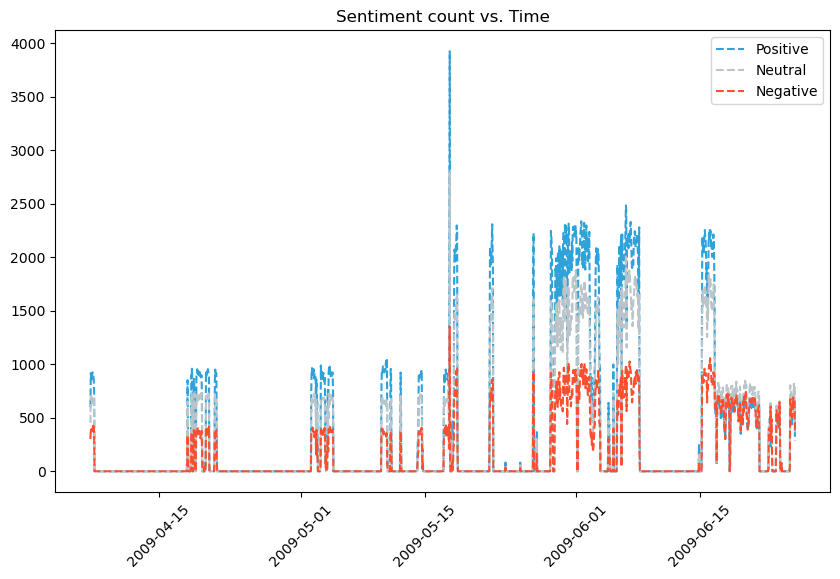

In [29]:
# Plot pivoted table results
plt.figure(figsize=(10,6))
plt.xticks(rotation=45)
plt.title("Sentiment count vs. Time")

plt1=plt.plot(tweet_pivoted_hourly['Positive'], '--', color='#30a2da', label='Positive')
plt2=plt.plot(tweet_pivoted_hourly['Neutral'], '--', color='#bbc4c8', label='Neutral')
plt3=plt.plot(tweet_pivoted_hourly['Negative'], '--', color='#fc4f30', label='Negative')

plt.legend()
plt.show

In [30]:
# Replace nan values with 0
tweet_pivoted_hourly = tweet_pivoted_hourly.replace(0, np.nan)

In [31]:
# Interpolate null values with time method
tweet_pivoted_hourly['Negative'].interpolate(method='time', inplace=True)
tweet_pivoted_hourly['Neutral'].interpolate(method='time', inplace=True)
tweet_pivoted_hourly['Positive'].interpolate(method='time', inplace=True)

In [32]:
# Print first 5 results
tweet_pivoted_hourly.head()

sentiment,Negative,Neutral,Positive
timestamp,,,
2009-04-07 06:00:00,301.0,453.0,599.0
2009-04-07 07:00:00,396.0,694.0,917.0
2009-04-07 08:00:00,379.0,707.0,854.0
2009-04-07 09:00:00,395.0,687.0,868.0
2009-04-07 10:00:00,375.0,663.0,854.0


<function matplotlib.pyplot.show(close=None, block=None)>

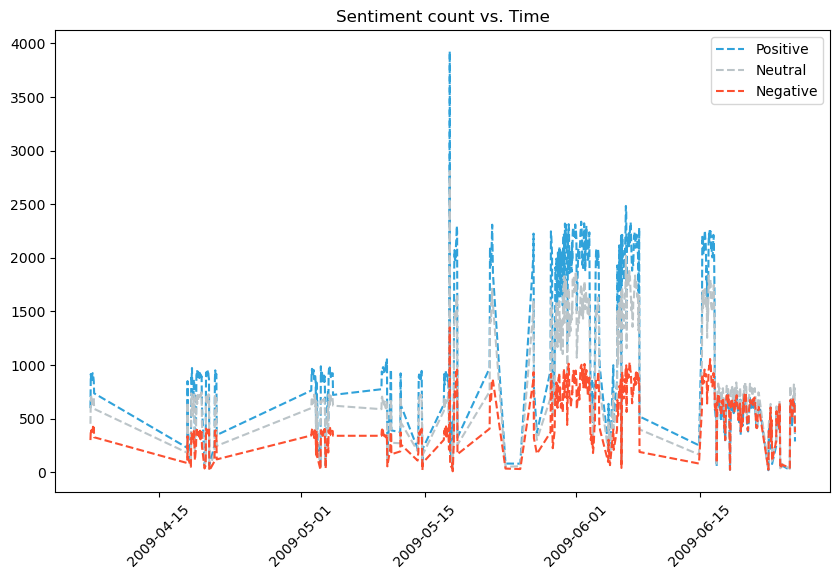

In [33]:
# Plot interpolated table results
plt.figure(figsize=(10,6))
plt.xticks(rotation=45)
plt.title("Sentiment count vs. Time")

plt1=plt.plot(tweet_pivoted_hourly['Positive'], '--', color='#30a2da', label='Positive')
plt2=plt.plot(tweet_pivoted_hourly['Neutral'], '--', color='#bbc4c8', label='Neutral')
plt3=plt.plot(tweet_pivoted_hourly['Negative'], '--', color='#fc4f30', label='Negative')

plt.legend()
plt.show

In [34]:
# Define sentiment score from interpolated data 
tweet_pivoted_hourly['score'] = (tweet_pivoted_hourly['Positive'] - tweet_pivoted_hourly['Negative']) / (tweet_pivoted_hourly['Positive'] + tweet_pivoted_hourly['Neutral'] + tweet_pivoted_hourly['Negative'])

In [35]:
# Print first 5 results
tweet_pivoted_hourly.head()

sentiment,Negative,Neutral,Positive,score
timestamp,,,,
2009-04-07 06:00:00,301.0,453.0,599.0,0.220251
2009-04-07 07:00:00,396.0,694.0,917.0,0.259591
2009-04-07 08:00:00,379.0,707.0,854.0,0.244845
2009-04-07 09:00:00,395.0,687.0,868.0,0.242564
2009-04-07 10:00:00,375.0,663.0,854.0,0.253171


<function matplotlib.pyplot.show(close=None, block=None)>

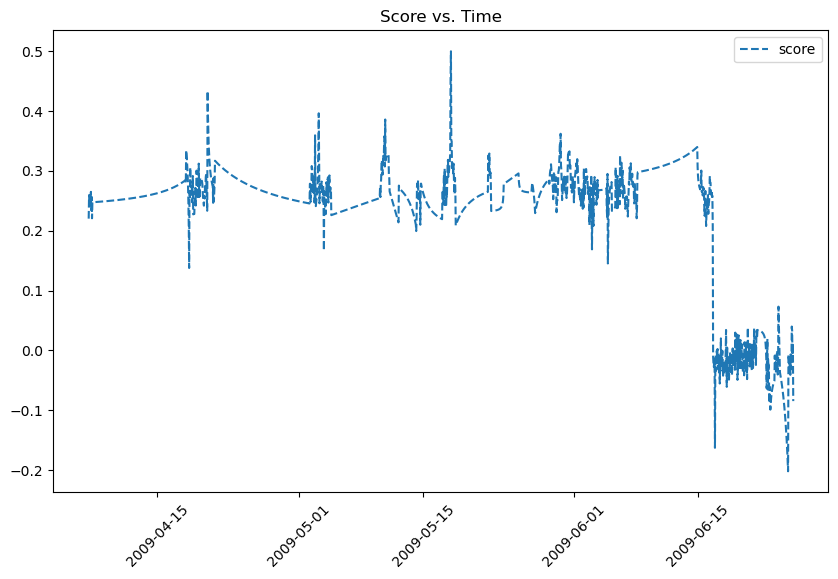

In [36]:
# Plot sentiment score results
plt.figure(figsize=(10,6))
plt.xticks(rotation=45)
plt.title("Score vs. Time")

plt1=plt.plot(tweet_pivoted_hourly['score'], '--', label='score')

plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

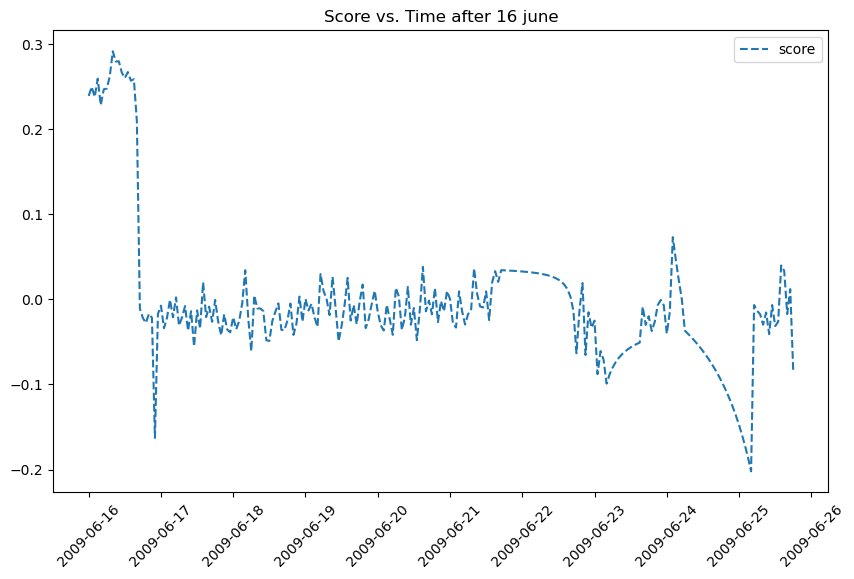

In [37]:
# plot sentiment score for period with sharp change in sentiment
plt.figure(figsize=(10,6))
plt.xticks(rotation=45)
plt.title("Score vs. Time after 16 june")

lin=plt.plot(tweet_pivoted_hourly['score'].loc['2009-06-16':], '--', label='score')

plt.legend()
plt.show

In [38]:
# import libraries for decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
%matplotlib inline

# Decompose data time-series for each sentiment
result_mul_neg = seasonal_decompose(tweet_pivoted_hourly['Negative'], model='multiplicative', extrapolate_trend='freq')
result_mul_neut = seasonal_decompose(tweet_pivoted_hourly['Neutral'], model='multiplicative', extrapolate_trend='freq')
result_mul_pos = seasonal_decompose(tweet_pivoted_hourly['Positive'], model='multiplicative', extrapolate_trend='freq')

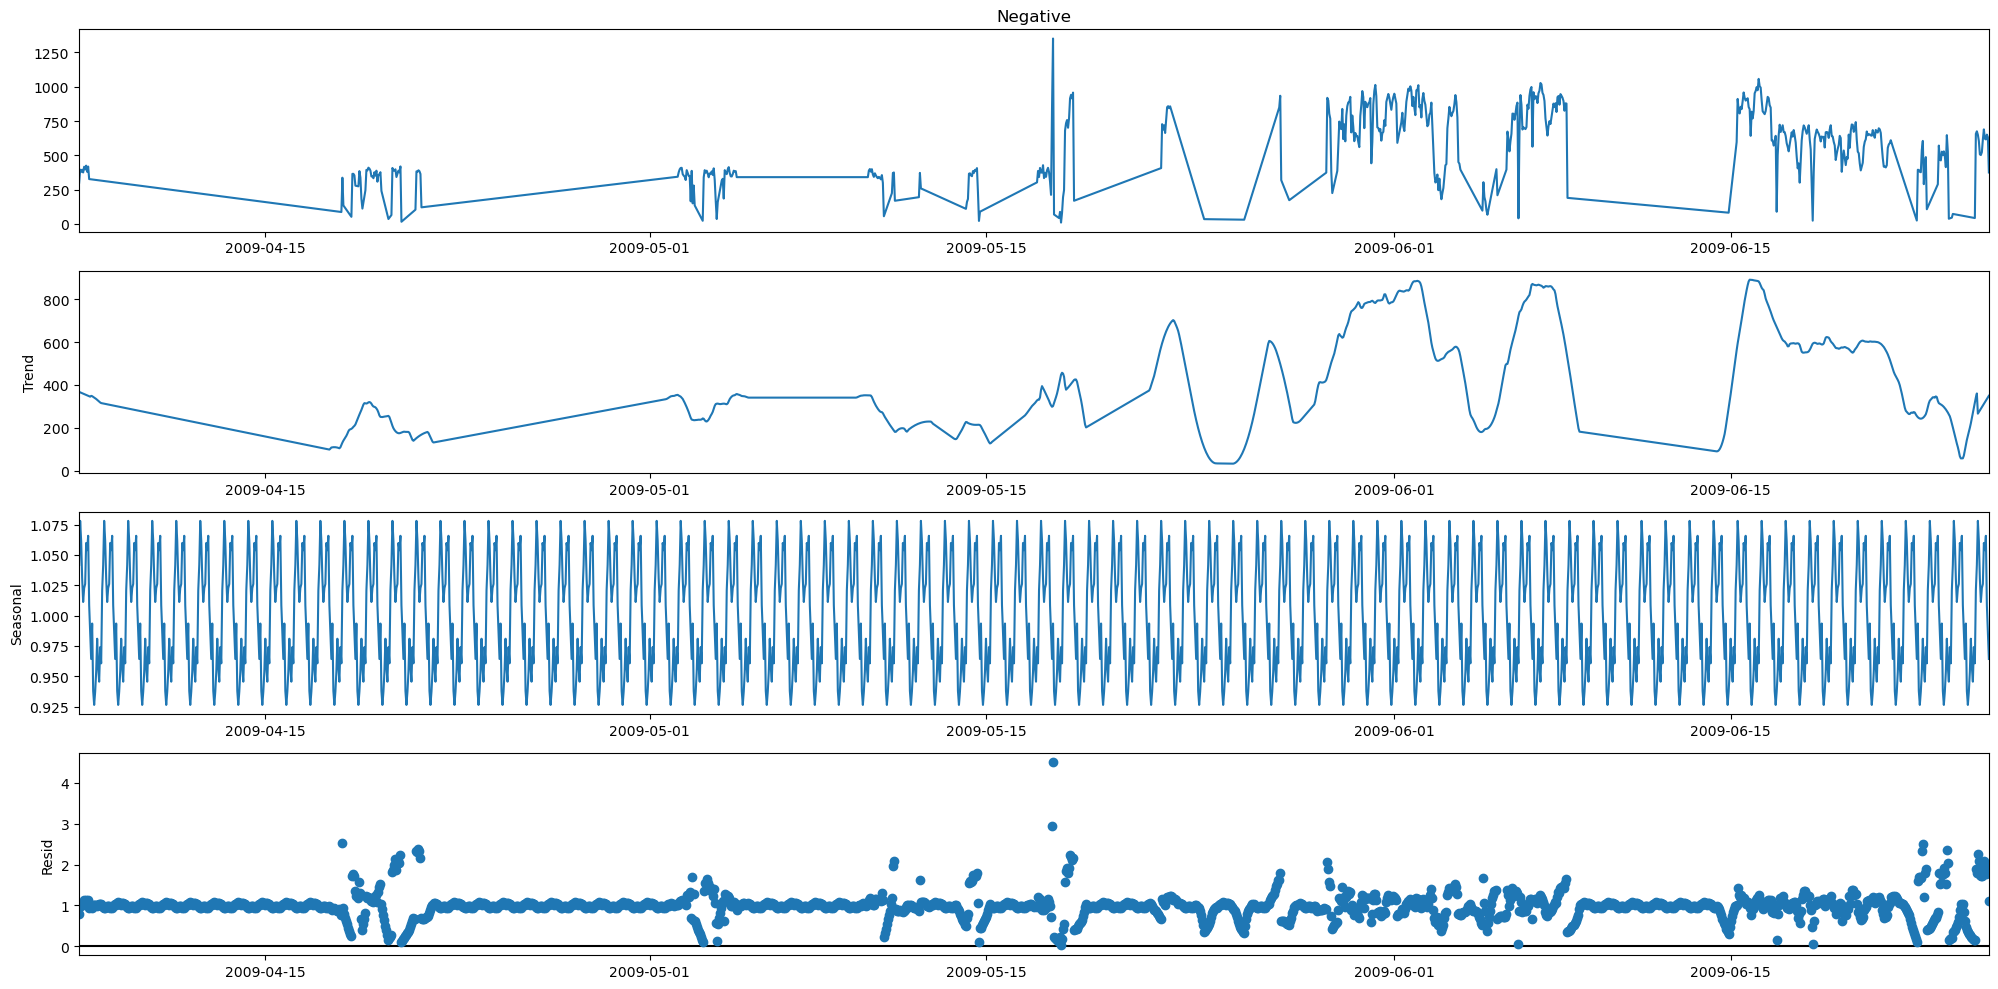

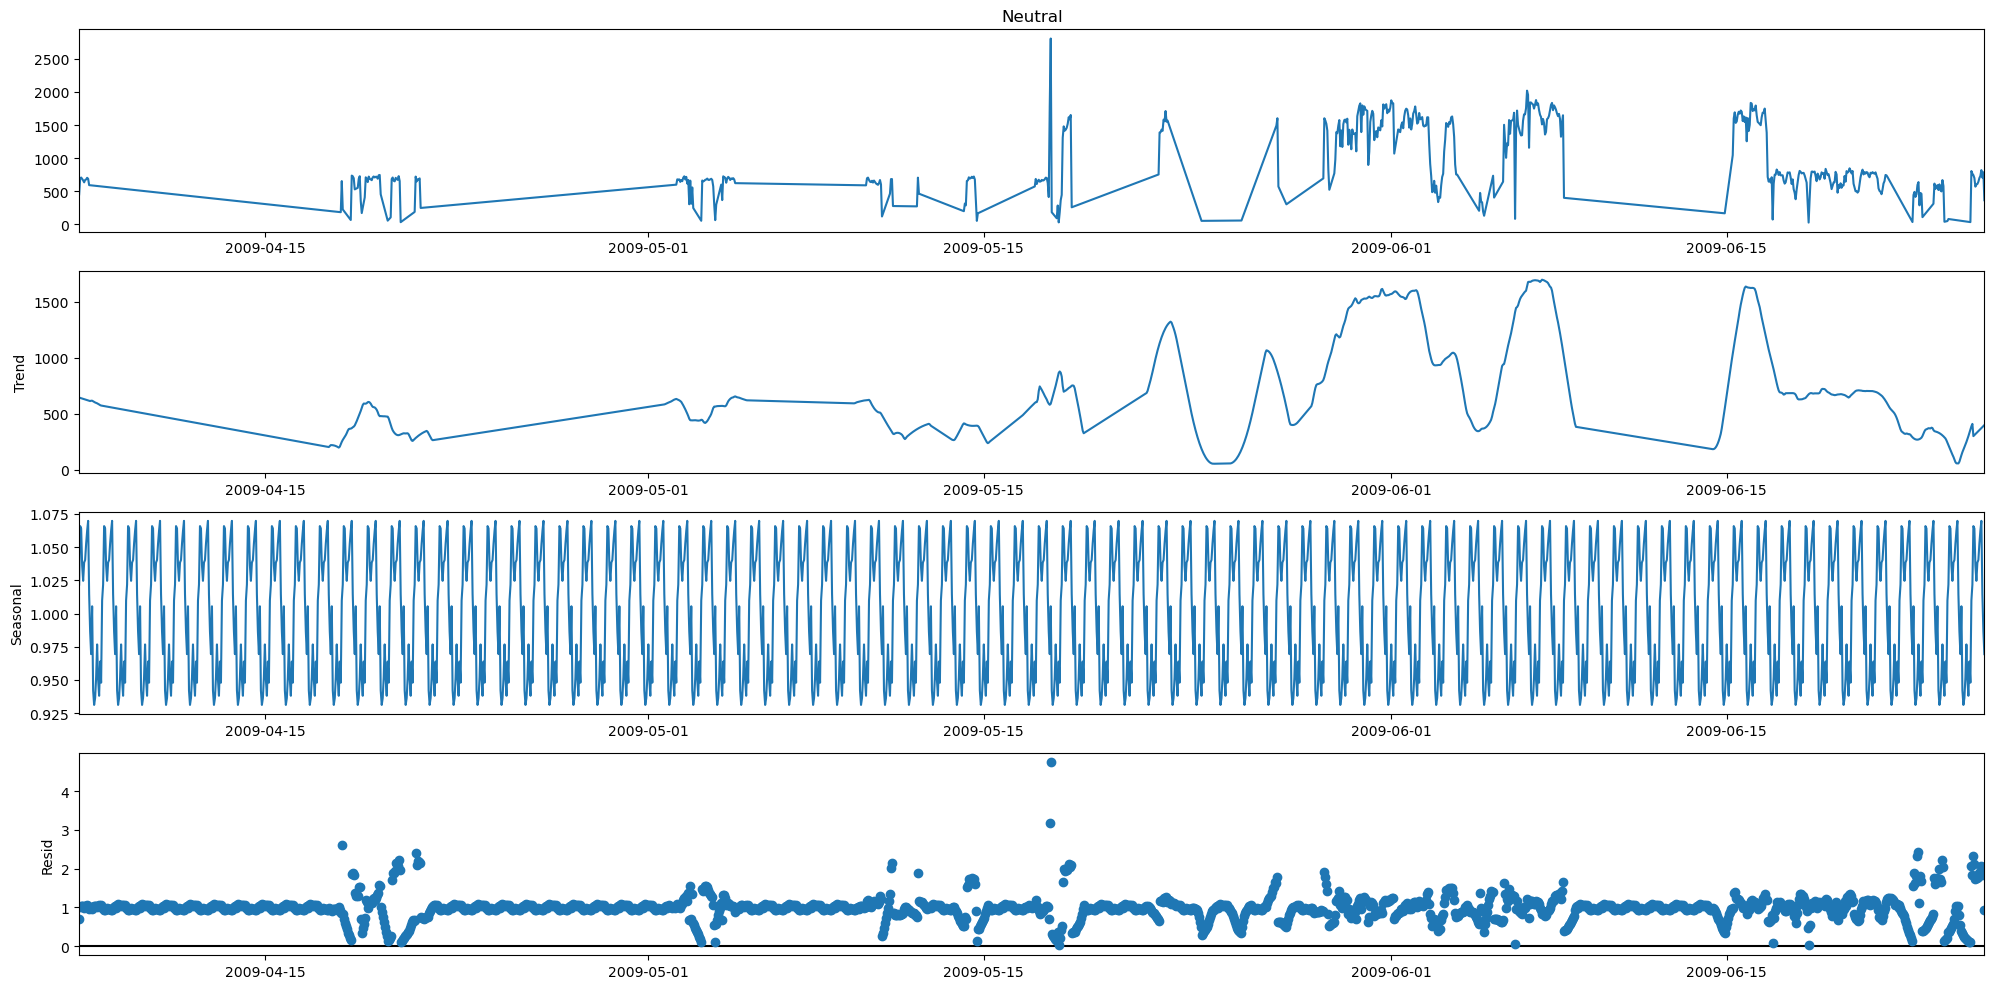

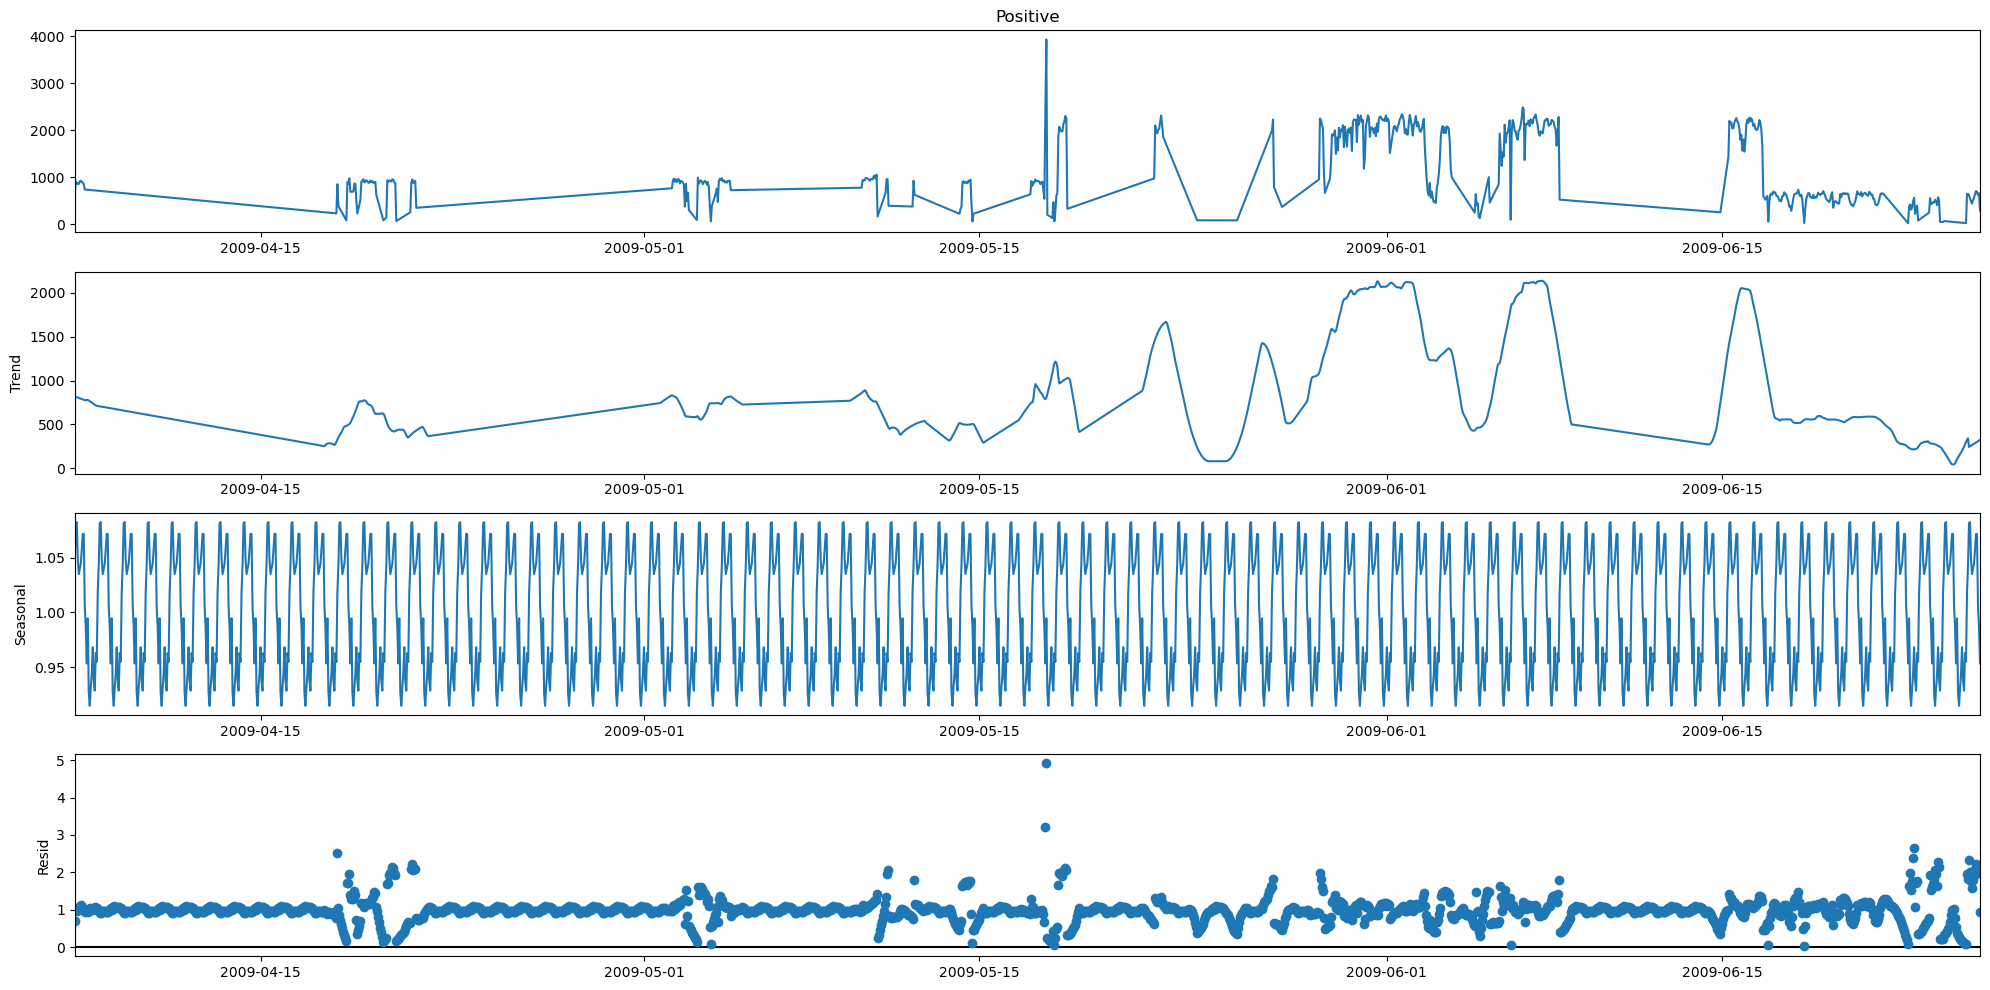

In [44]:
# Plot results of decomposed data for each sentiment
plt.rcParams.update({'figure.figsize': (20,10)})
result_mul_neg.plot()
result_mul_neut.plot()
result_mul_pos.plot()
plt.show()

In [45]:
# Combine trend decomposed data for each sentiment
result_mul_trend = pd.concat([result_mul_neg.trend, result_mul_neut.trend, result_mul_pos.trend], axis=1)
result_mul_trend.columns = ['Negative', 'Neutral', 'Positive']
result_mul_trend.head()

,Negative,Neutral,Positive
timestamp,,,
2009-04-07 06:00:00,367.741165,643.466087,818.376612
2009-04-07 07:00:00,365.718303,640.635416,814.255534
2009-04-07 08:00:00,363.695441,637.804744,810.134455
2009-04-07 09:00:00,361.672579,634.974073,806.013377
2009-04-07 10:00:00,359.649717,632.143401,801.892299


In [46]:
# Define sentiment trend values
pos = result_mul_trend['Positive']
neutral = result_mul_trend['Neutral']
neg = result_mul_trend['Negative']

In [47]:
# Apply normalization of the trend data
norm = (pos - neg) / (pos + neutral + neg)

In [48]:
# Get Sentiment score from trend data
result_mul_trend['score'] = norm

In [49]:
# Print first 5 rows of sentimnent trend dataframe
result_mul_trend.head()

,Negative,Neutral,Positive,score
timestamp,,,,
2009-04-07 06:00:00,367.741165,643.466087,818.376612,0.246305
2009-04-07 07:00:00,365.718303,640.635416,814.255534,0.246367
2009-04-07 08:00:00,363.695441,637.804744,810.134455,0.246429
2009-04-07 09:00:00,361.672579,634.974073,806.013377,0.246492
2009-04-07 10:00:00,359.649717,632.143401,801.892299,0.246555


<function matplotlib.pyplot.show(close=None, block=None)>

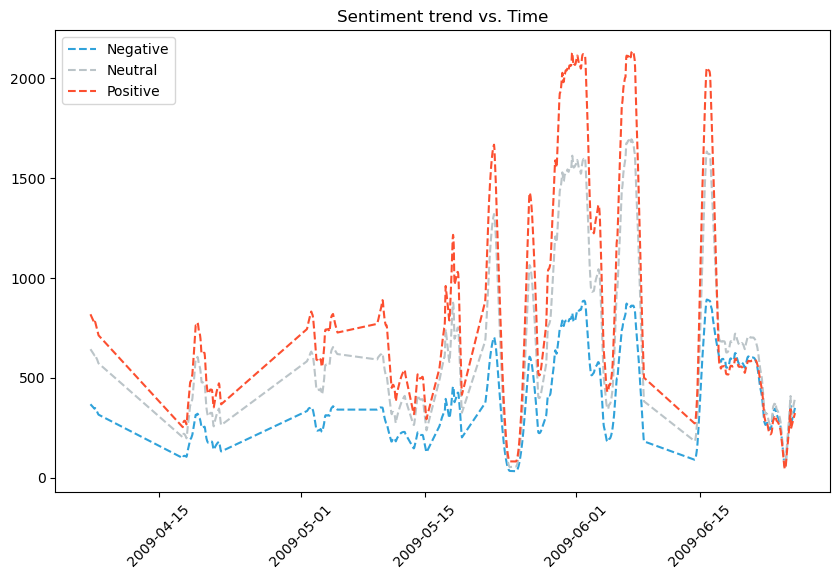

In [50]:
# Plot trend for each sentiment
plt.figure(figsize=(10,6))
plt.xticks(rotation=45)
plt.title("Sentiment trend vs. Time")

plt1=plt.plot(result_mul_trend['Negative'], '--', color='#30a2da', label='Negative')
plt2=plt.plot(result_mul_trend['Neutral'], '--', color='#bbc4c8', label='Neutral')
plt3=plt.plot(result_mul_trend['Positive'], '--', color='#fc4f30', label='Positive')


plt.legend()
plt.show

In [51]:
# Define sentiment data to be exported for dashboarding
tweets_trend = result_mul_trend[result_mul_trend.index < pd.to_datetime("2009-06-01 06:00:00", format='%Y-%m-%d')]

In [52]:
# Write tweets_trend to output folder
filepath = "tweets_output/tweets_trend.csv"
tweets_trend.to_csv(filepath)

## Sentiment Forecast Analysis

In [69]:
# Import Forecast models and MSE metric
import datetime as dt
from sklearn.metrics import mean_squared_error

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA

'''#relax the display limits on columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)'''

"#relax the display limits on columns and rows\npd.set_option('display.max_columns', None)\npd.set_option('display.max_rows', None)"

In [70]:
# Get data to forecast
tweet_forecast = result_mul_trend.drop(columns=['Negative','Neutral','Positive'])

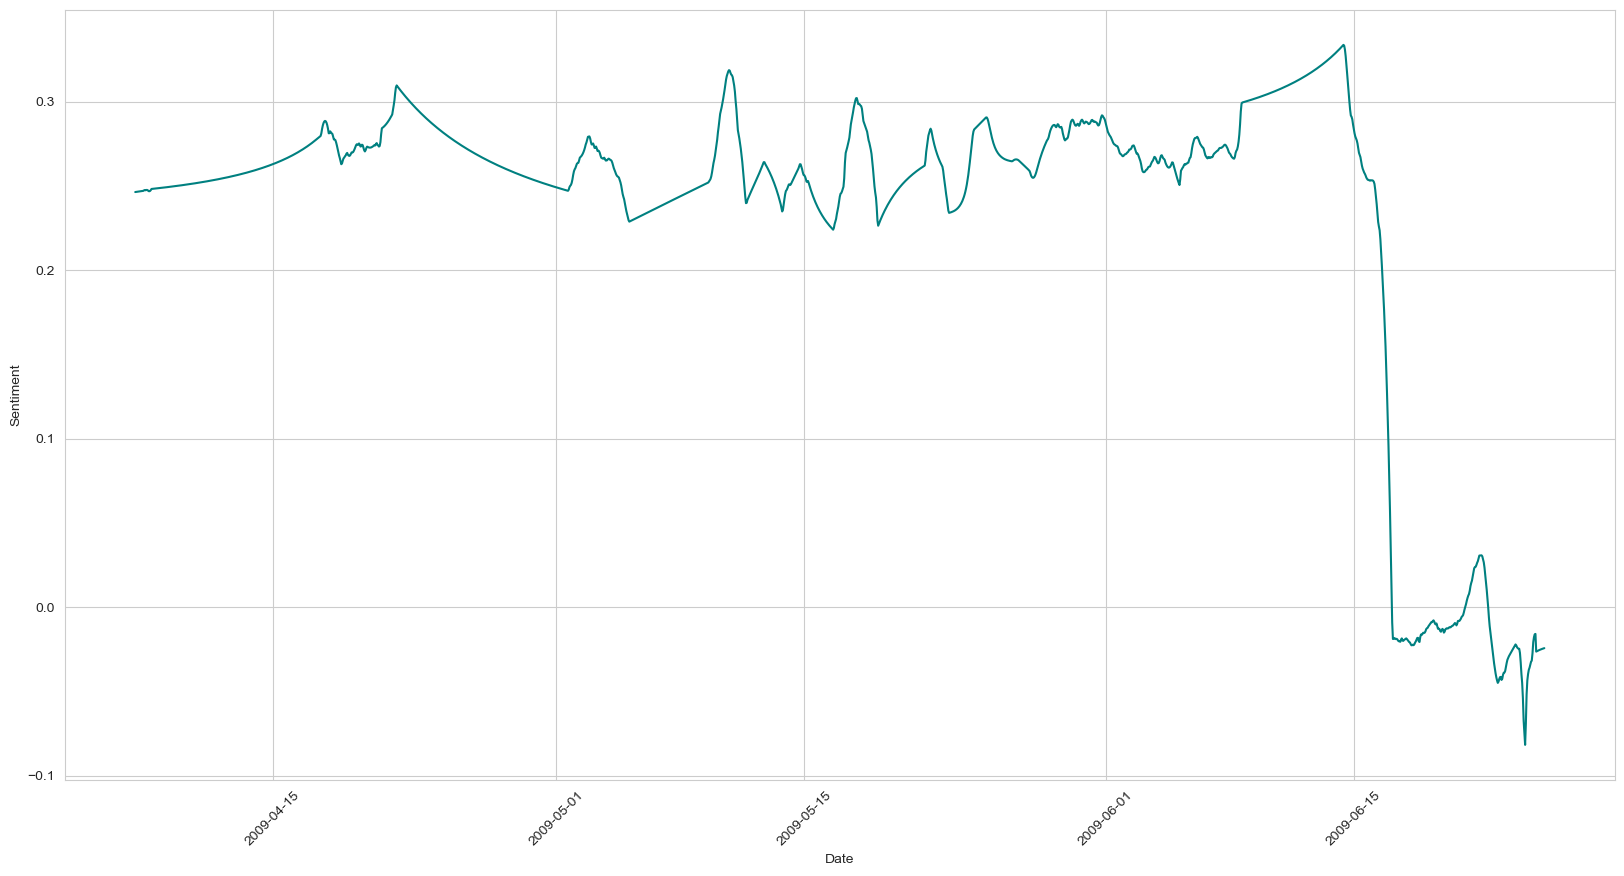

In [71]:
# Plot sentiment score trend
sns.set_style('whitegrid')
plt.ylabel('Sentiment')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.plot(tweet_forecast.index, tweet_forecast['score'],color='teal' )
plt.show()

In [72]:
# Split data time-series into train and test
train = tweet_forecast[tweet_forecast.index < pd.to_datetime("2009-06-01 06:00:00")]
test = tweet_forecast[tweet_forecast.index >= pd.to_datetime("2009-06-01 06:00:00", format='%Y-%m-%d')]

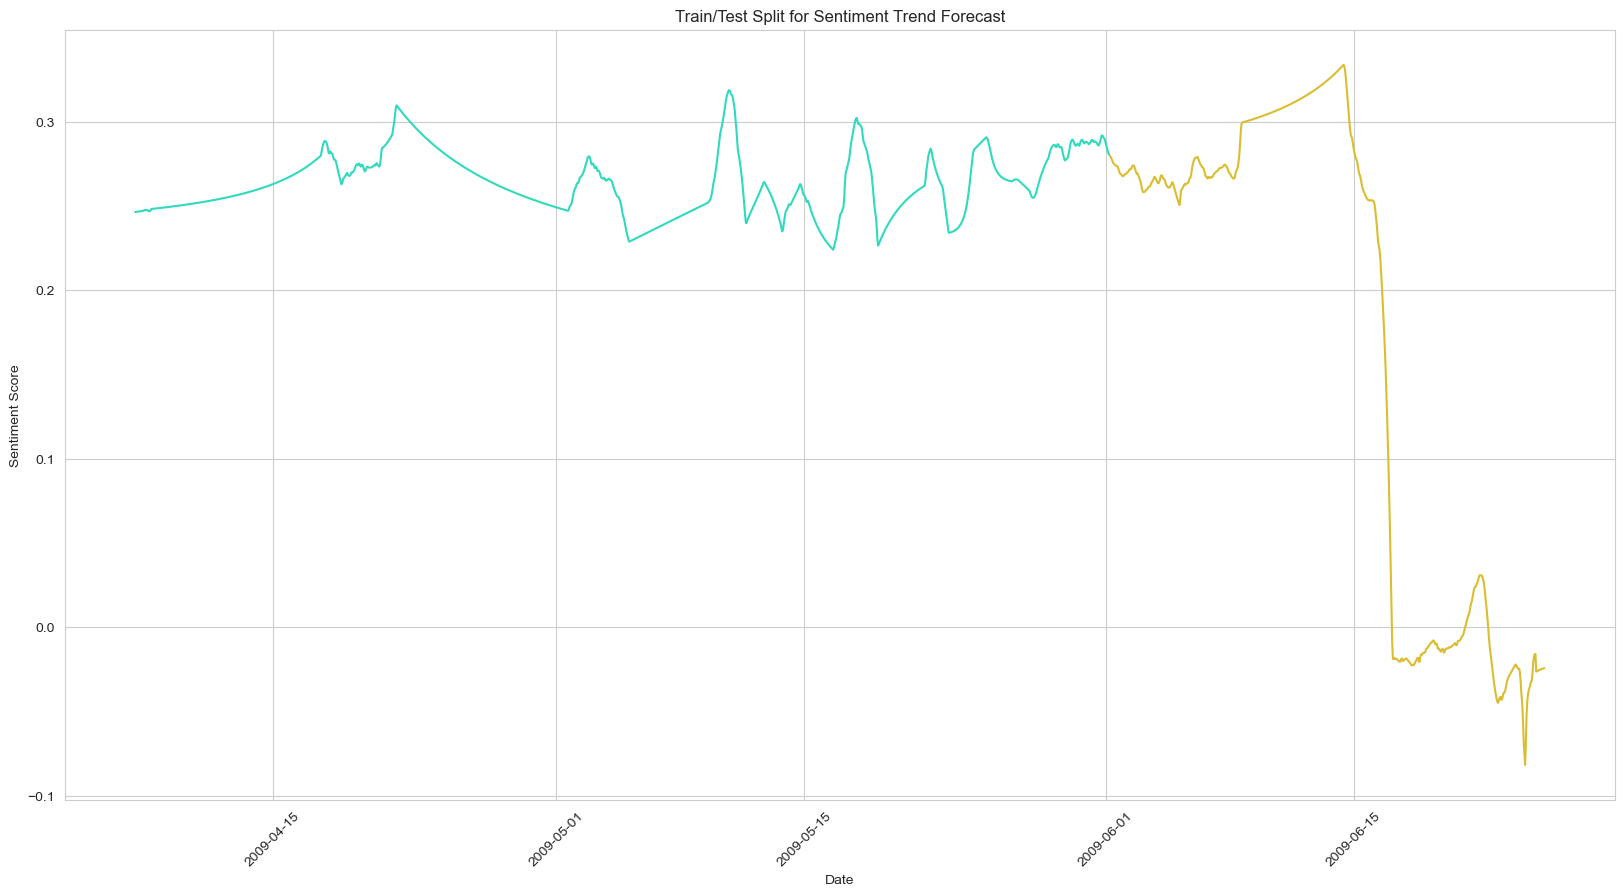

In [73]:
# Plot train and test split
sns.set_style('whitegrid')
plt.plot(train, color = "#30dabd", label = 'Training')
plt.plot(test, color = "#dabd30", label = 'Testing')
plt.ylabel('Sentiment Score')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test Split for Sentiment Trend Forecast")
plt.show()

In [74]:
# Perform sentiment forecasting with ARMA
y = train['score']

ARMAmodel = SARIMAX(y, order = (2, 0, 1))
ARMAmodel = ARMAmodel.fit()

y_pred_arma = ARMAmodel.get_forecast(len(test.index))
y_pred_arma_df = y_pred_arma.conf_int(alpha = 0.05) 
y_pred_arma_df["Predictions"] = ARMAmodel.predict(start = y_pred_arma_df.index[0], 
                                             end = y_pred_arma_df.index[-1])
y_pred_arma_df.index = test.index
y_pred_outARMA = y_pred_arma_df["Predictions"]

In [75]:
# Print ARMA RMSE results
arma_rmse_1w = np.sqrt(mean_squared_error(test['score'].truncate(before = "2009-06-01 06:00:00", after = "2009-06-08 06:00:00").values, y_pred_outARMA.truncate(before = "2009-06-01 06:00:00", after = "2009-06-08 06:00:00")))
arma_rmse_2w = np.sqrt(mean_squared_error(test['score'].truncate(before = "2009-06-01 06:00:00", after = "2009-06-15 06:00:00").values, y_pred_outARMA.truncate(before = "2009-06-01 06:00:00", after = "2009-06-15 06:00:00")))
arma_rmse_3w = np.sqrt(mean_squared_error(test['score'].values, y_pred_outARMA))

print("ARMA RMSE 1 Week: ",arma_rmse_1w)
print("ARMA RMSE 2 Weeks: ",arma_rmse_2w)
print("ARMA RMSE 3 Weeks: ",arma_rmse_3w)

ARMA RMSE 1 Week:  0.009676292256495
ARMA RMSE 2 Weeks:  0.027997016456660008
ARMA RMSE 3 Weeks:  0.17367497004291496


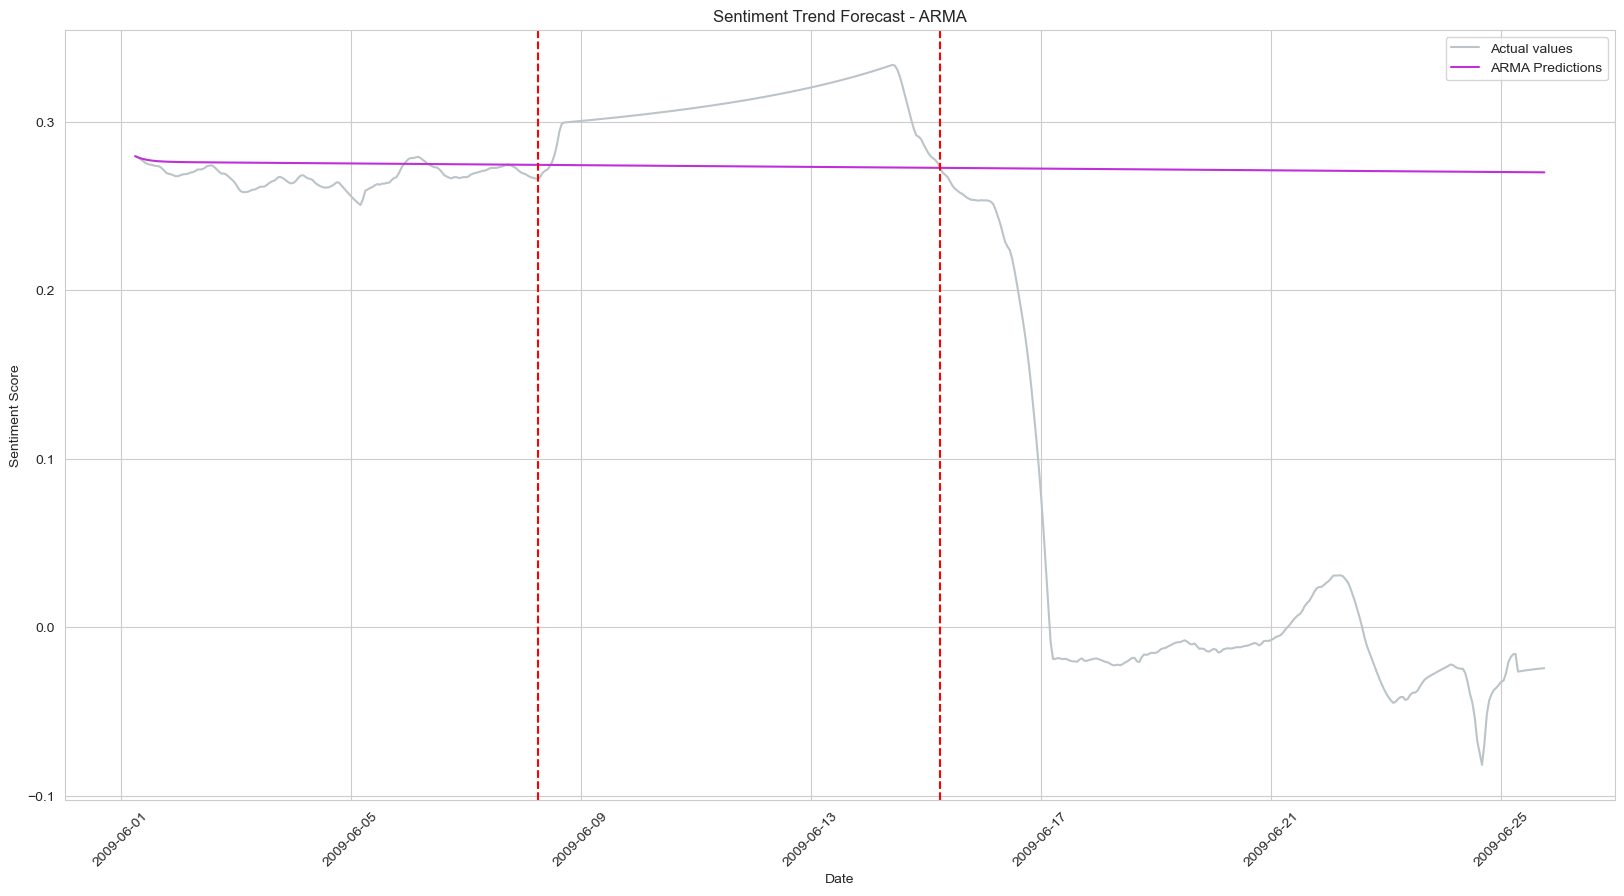

In [95]:
# Plot ARMA predicted results
sns.set_style('whitegrid')

plt.plot(test.loc['2009-06-01':], color='#bbc4c8', label = 'Actual values')
plt.plot(y_pred_outARMA, color="#bd30da", label = 'ARMA Predictions')

plt.axvline(dt.datetime(2009, 6, 8, 6, 0), color='red', linestyle='dashed')
plt.axvline(dt.datetime(2009, 6, 15, 6, 0), color='red', linestyle='dashed')

plt.title("Sentiment Trend Forecast - ARMA")
plt.ylabel('Sentiment Score')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [77]:
# Perform sentiment forecasting with ARIMA
ARIMAmodel = SARIMAX(y, order = (2, 1,1))
ARIMAmodel = ARIMAmodel.fit()

y_pred_arima = ARIMAmodel.get_forecast(len(test.index))
y_pred_arima_df = y_pred_arima.conf_int(alpha = 0.05) 
y_pred_arima_df["Predictions"] = ARIMAmodel.predict(start = y_pred_arima_df.index[0],
                                              end = y_pred_arima_df.index[-1])
y_pred_arima_df.index = test.index
y_pred_outARIMA = y_pred_arima_df["Predictions"]

In [78]:
# Print ARIMA RMSE results
arima_rmse_1w = np.sqrt(mean_squared_error(test['score'].truncate(before = "2009-06-01 06:00:00", after = "2009-06-08 06:00:00").values, y_pred_outARIMA.truncate(before = "2009-06-01 06:00:00", after = "2009-06-08 06:00:00")))
arima_rmse_2w = np.sqrt(mean_squared_error(test['score'].truncate(before = "2009-06-01 06:00:00", after = "2009-06-15 06:00:00").values, y_pred_outARIMA.truncate(before = "2009-06-01 06:00:00", after = "2009-06-15 06:00:00")))
arima_rmse_3w = np.sqrt(mean_squared_error(test['score'].values, y_pred_outARIMA))

print("ARIMA RMSE 1 Week: ",arima_rmse_1w)
print("ARIMA RMSE 2 Weeks: ",arima_rmse_2w)
print("ARIMA RMSE 3 Weeks: ",arima_rmse_3w)

ARIMA RMSE 1 Week:  0.009980293648109626
ARIMA RMSE 2 Weeks:  0.026601907528919583
ARIMA RMSE 3 Weeks:  0.17636075613715388


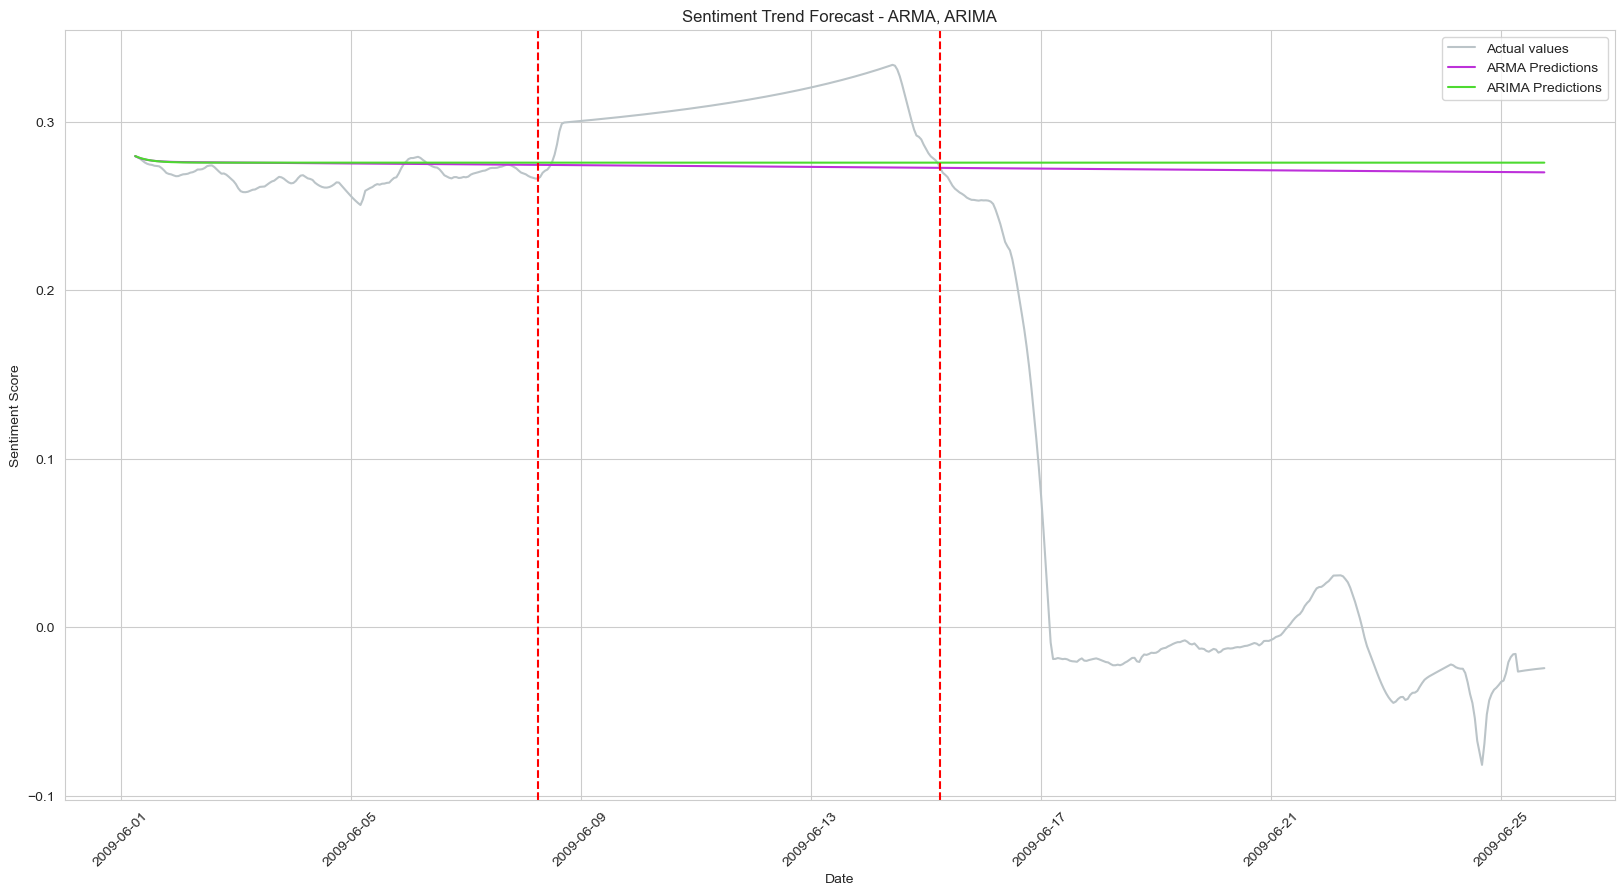

In [79]:
# Plot ARIMA predicted results
sns.set_style('whitegrid')
plt.plot(test.loc['2009-06-01':], color = "#bbc4c8", label = 'Actual values')
plt.plot(y_pred_outARMA.loc['2009-06-01':], color="#bd30da", label = 'ARMA Predictions')
plt.plot(y_pred_outARIMA.loc['2009-06-01':], color="#4dda30", label = 'ARIMA Predictions')

plt.axvline(dt.datetime(2009, 6, 8, 6, 0), color='red', linestyle='dashed')
plt.axvline(dt.datetime(2009, 6, 15, 6, 0), color='red', linestyle='dashed')

plt.title("Sentiment Trend Forecast - ARMA, ARIMA")
plt.ylabel('Sentiment Score')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [80]:
#!pip install skforecast

In [84]:
# Import Random Forest model and ForecasterAutoreg libraries
from sklearn.ensemble import RandomForestRegressor
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.model_selection import grid_search_forecaster

In [85]:
# Print test shape
test.shape

(589, 1)

In [86]:
# Hyperparameter Grid search
steps = 589
forecaster = ForecasterAutoreg(regressor=RandomForestRegressor(random_state=123),lags= 12)

# Lags used as predictors
lags_grid = [10, 20]

# Regressor's hyperparameters
param_grid = {'n_estimators': [10, 20],
              'max_depth': [3, 5, 10]}

results_grid = grid_search_forecaster(
                        forecaster         = forecaster,
                        y                  = train['score'],
                        param_grid         = param_grid,
                        lags_grid          = lags_grid,
                        steps              = steps,
                        refit              = True,
                        metric             = 'mean_squared_error',
                        initial_train_size = int(len(train)*0.5),
                        fixed_train_size   = False,
                        return_best        = True,
                        verbose            = False
               )

Number of models compared: 12.


lags grid:   0%|          | 0/2 [00:00<?, ?it/s]

params grid:   0%|          | 0/6 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] 
  Parameters: {'max_depth': 3, 'n_estimators': 20}
  Backtesting metric: 0.0004223293521128762



In [87]:
# Print grid Search results
results_grid

,lags,params,mean_squared_error,max_depth,n_estimators
7,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 3, 'n_estimators': 20}",0.000422,3,20
6,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 3, 'n_estimators': 10}",0.000423,3,10
0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 3, 'n_estimators': 10}",0.000426,3,10
1,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 3, 'n_estimators': 20}",0.000427,3,20
3,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 5, 'n_estimators': 20}",0.000438,5,20
11,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 10, 'n_estimators': 20}",0.000442,10,20
10,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 10, 'n_estimators': 10}",0.000442,10,10
5,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 10, 'n_estimators': 20}",0.000447,10,20
8,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 5, 'n_estimators': 10}",0.000447,5,10
9,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 5, 'n_estimators': 20}",0.000447,5,20


In [88]:
# Train forecaster max_depth=3, n_estimators=20
forecaster = ForecasterAutoreg(regressor=RandomForestRegressor(max_depth=3, n_estimators=20, random_state=123), lags= 12)
forecaster.fit(y=train['score'])
y_pred_outRF = forecaster.predict(steps=steps)

In [89]:
# Print RF RMSE results
rf_rmse_1w = np.sqrt(mean_squared_error(test['score'].truncate(before = "2009-06-01 06:00:00", after = "2009-06-08 06:00:00"), y_pred_outRF.truncate(before = "2009-06-01 06:00:00", after = "2009-06-08 06:00:00")))
rf_rmse_2w = np.sqrt(mean_squared_error(test['score'].truncate(before = "2009-06-01 06:00:00", after = "2009-06-15 06:00:00"), y_pred_outRF.truncate(before = "2009-06-01 06:00:00", after = "2009-06-15 06:00:00")))
rf_rmse_3w = np.sqrt(mean_squared_error(test['score'], y_pred_outRF))

print("RF RMSE 1 Week: ", rf_rmse_1w)
print("RF RMSE 2 Weeks: ", rf_rmse_2w)
print("RF RMSE 3 Weeks: ", rf_rmse_3w)

RF RMSE 1 Week:  0.011984708586438294
RF RMSE 2 Weeks:  0.025546876673429544
RF RMSE 3 Weeks:  0.1777408119081707


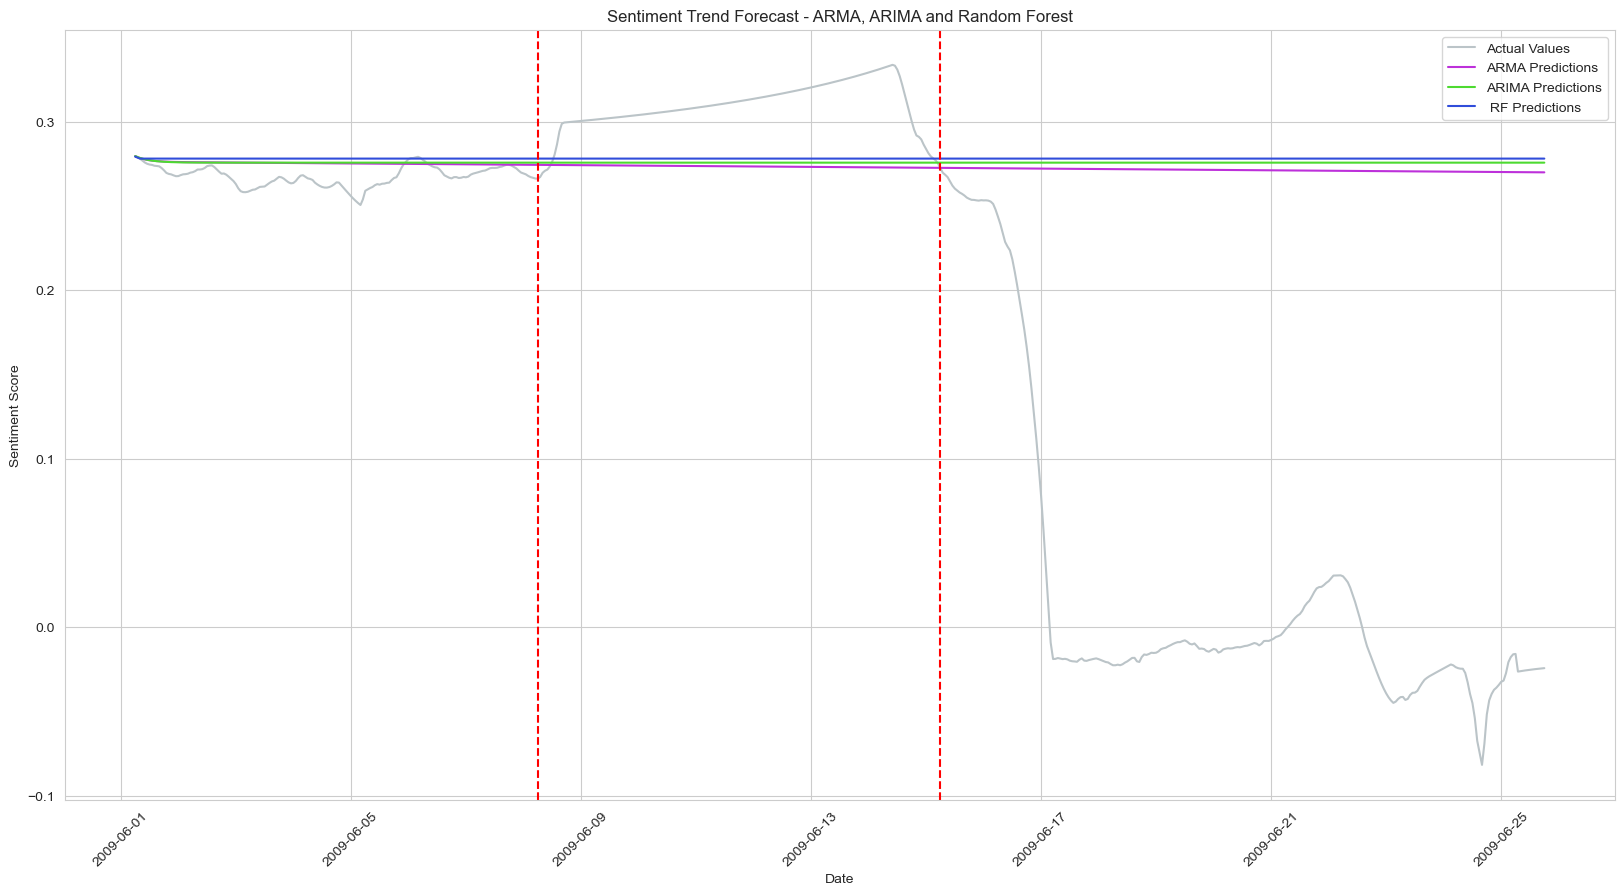

In [91]:
# Plot RF predicted results
plt.plot(test.loc['2009-06-01 06:00:00':], color="#bbc4c8", label = 'Actual Values')
plt.plot(y_pred_outARMA.loc['2009-06-01 06:00:00':], color="#bd30da", label = 'ARMA Predictions')
plt.plot(y_pred_outARIMA.loc['2009-06-01 06:00:00':], color="#4dda30", label = 'ARIMA Predictions')
plt.plot(y_pred_outRF.loc['2009-06-01 06:00:00':], color="#304dda", label=' RF Predictions')

plt.axvline(dt.datetime(2009, 6, 8, 6, 0), color='red', linestyle='dashed')
plt.axvline(dt.datetime(2009, 6, 15, 6, 0), color='red', linestyle='dashed')

plt.title("Sentiment Trend Forecast - ARMA, ARIMA and Random Forest")
plt.ylabel('Sentiment Score')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.legend()
plt.show()


In [92]:
# Rename predicted columns
pred_outARMA = pd.DataFrame(y_pred_outARMA).rename(columns = {'Predictions':'Arma'})
pred_outARIMA = pd.DataFrame(y_pred_outARIMA).rename(columns = {'Predictions':'Arima'})
pred_outforecaster = pd.DataFrame(y_pred_outRF).rename(columns = {'pred':'Forecaster'})

In [93]:
# Define output dataframe for Forecasting models
pred_out = pd.concat([test, pred_outARMA,pred_outARIMA,pred_outforecaster],axis=1).reset_index().rename(columns = {'score':'Actual Value','index':'timestamp'})

In [94]:
# Print first 5 rows
pred_out.head()

,timestamp,Actual Value,Arma,Arima,Forecaster
0,2009-06-01 06:00:00,0.279504,0.279432,0.279506,0.279147
1,2009-06-01 07:00:00,0.278872,0.278802,0.278903,0.278546
2,2009-06-01 08:00:00,0.277925,0.278286,0.278400,0.278009
3,2009-06-01 09:00:00,0.276835,0.277864,0.277969,0.278009
4,2009-06-01 10:00:00,0.275688,0.277518,0.277608,0.278009


In [236]:
# Define output path and write dataframe into csv format
filepath = "tweets_output/tweets_pred.csv"

pred_out.to_csv(filepath)